In [1]:
#Importing necessary packages
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import glob
import pandas as pd
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
imagePaths = ['COCODataset/validation/data', 'Test Images/EmojiImagesOne']

In [3]:
#Setting Counters
insetCounter = 0
notInsetCounter = 0

#For each path
for imagePath in imagePaths:

    #For each image and its corresponding Inset attribute value in the csv file
    for image in glob.glob(imagePath + "/*"):
        
        #Open the image
        image = Image.open(image)

        #If it is Inset
        if imagePath == 'COCODataset/validation/data':
            #Save the image in the inset folder
            image.save('.\\Emoji_Classification\\notinset\\Image'+str(insetCounter)+".jpg")
            insetCounter = insetCounter + 1
        else:
            #Save the image in the notinset folder
            image.save('.\\Emoji_Classification\\inset\\Image'+str(notInsetCounter)+".jpg")
            notInsetCounter = notInsetCounter + 1

In [4]:
#Setting parameters to be used
batchSize = 32
imageHeight = 180
imageWidth = 180

#Path from where to retrieve images
dataDirectory = ".\\Emoji_Classification\\"

In [5]:
#Getting Training Set
trainingSet = tf.keras.utils.image_dataset_from_directory(
  dataDirectory,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (imageHeight, imageWidth),
  batch_size = batchSize)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.


In [6]:
#Getting Validation Set
validationSet = tf.keras.utils.image_dataset_from_directory(
  dataDirectory,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (imageHeight, imageWidth),
  batch_size = batchSize)

Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


In [7]:
#Retrieving Class Names and displaying them
classNames = trainingSet.class_names
print(classNames)

['inset', 'notinset']


In [8]:
#Configuring Dataset and caching it
AUTOTUNE = tf.data.AUTOTUNE

trainingSet = trainingSet.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validationSet = validationSet.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
#Normalising the data
normalisationLayer = layers.Rescaling(1./255)
normalisedSet = trainingSet.map(lambda x, y: (normalisationLayer(x), y))
imageBatch, labelsBatch = next(iter(normalisedSet))
firstImage = imageBatch[0]

In [10]:
#Getting number of classes
numberOfClasses = len(classNames)

#Creating Keras Sequential Model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(imageHeight, imageWidth, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(numberOfClasses)
])

In [11]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
#Displaying Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
#Setting number of epochs to occur
epochs = 10

#Training the Model
history = model.fit(
  trainingSet,
  validation_data = validationSet,
  epochs = epochs
)

Epoch 1/10
250/250 [==============================] - 102s 290ms/step - loss: 0.6841 - accuracy: 0.5842 - val_loss: 0.6305 - val_accuracy: 0.6375
Epoch 2/10
250/250 [==============================] - 68s 271ms/step - loss: 0.6053 - accuracy: 0.6679 - val_loss: 0.5941 - val_accuracy: 0.6655
Epoch 3/10
250/250 [==============================] - 67s 268ms/step - loss: 0.5728 - accuracy: 0.6957 - val_loss: 0.5586 - val_accuracy: 0.6960
Epoch 4/10
250/250 [==============================] - 66s 264ms/step - loss: 0.5508 - accuracy: 0.7089 - val_loss: 0.5644 - val_accuracy: 0.6955
Epoch 5/10
250/250 [==============================] - 66s 263ms/step - loss: 0.5257 - accuracy: 0.7312 - val_loss: 0.5507 - val_accuracy: 0.7210
Epoch 6/10
250/250 [==============================] - 66s 264ms/step - loss: 0.5018 - accuracy: 0.7418 - val_loss: 0.5458 - val_accuracy: 0.7140
Epoch 7/10
250/250 [==============================] - 66s 264ms/step - loss: 0.4830 - accuracy: 0.7590 - val_loss: 0.5428 - val_a

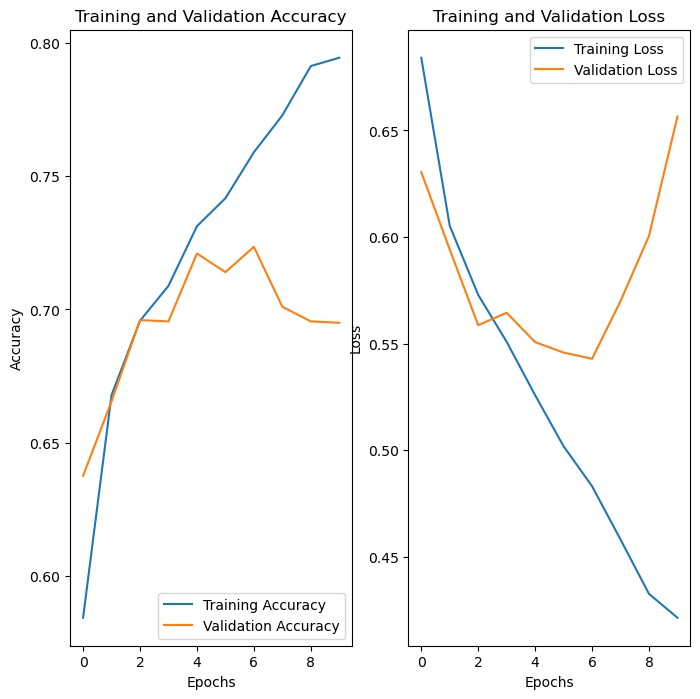

In [14]:
#Retrieving accuracy and loss of both the training set and validation set
accuracy = history.history['accuracy']
validationAccuracy = history.history['val_accuracy']
loss = history.history['loss']
validationLoss = history.history['val_loss']

#Retrieving the range of epochs
epochsRange = range(epochs)

#Plotting the Graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochsRange, accuracy, label='Training Accuracy')
plt.plot(epochsRange, validationAccuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochsRange, loss, label='Training Loss')
plt.plot(epochsRange, validationLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.show()